In [ ]:
# The goal of this challenge is to build a model that predicts conversion rate and, 
# based on the model, come up with ideas to improve it.

# Your project is to:

# Predict conversion rate

# Come up with recommendations for the product team and the marketing team to improve conversion rate

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 350)
  
#read from google drive
data=pd.read_csv("https://drive.google.com/uc?export=download&id=1KvxyyF3QCtvIx0J7_8iWDEtFQpLgd0Yq")


In [3]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [50]:
for column in data.columns:
    uniques = sorted(data[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

country                  4	 ['China', 'Germany', 'UK', 'US']
age                     58	 [17, 18, 19, 20, 21]
new_user                 2	 [0, 1]
source                   3	 ['Ads', 'Direct', 'Seo']
total_pages_visited     29	 [1, 2, 3, 4, 5]
converted                2	 [0, 1]


In [5]:
data.describe()
# age : user age. Self-reported at sign-up step

# new_user : whether the user created the account during this session 
# or had already an account and simply came back to the site

# total_pages_visited: number of total pages visited during the session. 
# This can be seen as a proxy for time spent on site and engagement

# converted: this is our label. 1 means they converted within the session, 0 means they left without buying anything. 
# The company goal is to increase conversion rate: # conversions / total sessions
# if we predict everything with non-converted, we'll still get 97% accuracy 

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [6]:
data.source.value_counts()
# source : marketing channel source
# Ads: came to the site by clicking on an advertisement
# Seo: came to the site by clicking on search results
# Direct: came to the site by directly typing the URL on the browser 

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

In [7]:
data.country.value_counts()
# country : user country based on the IP address

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

In [13]:
# max age 123 yrs! Let’s investigate it: 
print(sorted(data.age.unique(), reverse=True))

# Age 123 and 111 don't make sense
print(data[data['age']>110])

# only 2 records,can simply get ride of them
data = data[data['age']<110]

[123, 111, 79, 77, 73, 72, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17]
        country  age  new_user source  total_pages_visited  converted
90928   Germany  123         0    Seo                   15          1
295581       UK  111         0    Ads                   10          1


In [14]:
# Get a sense of the variables

In [16]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


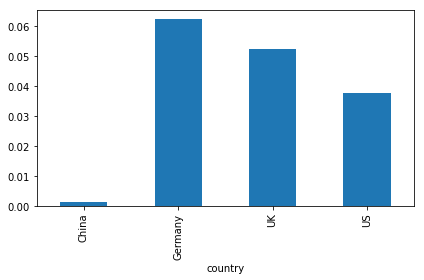

In [17]:
data.groupby(['country'])['converted'].mean().plot.bar()
plt.show()
# Low conversion rate for Chinese users
# Germany is high 

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


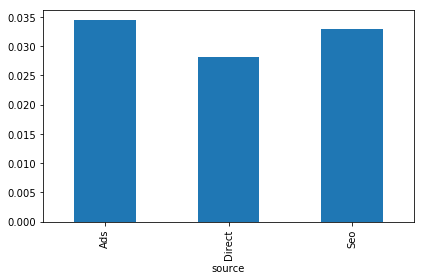

In [18]:
data.groupby(['source'])['converted'].mean().plot.bar()
plt.show()
# Relatively same accross source 

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


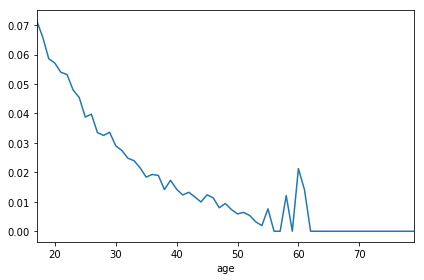

In [21]:
data.groupby(['age'])['converted'].mean().plot()
plt.show()
# 20s have high converation rate 

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


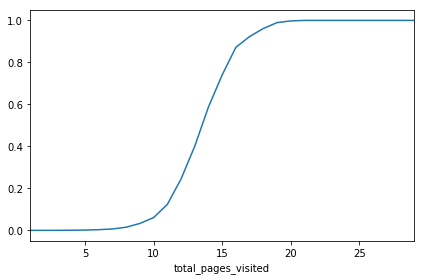

In [22]:
data.groupby(['total_pages_visited'])['converted'].mean().plot()
plt.show()
# Definitely spending more time on the site implies higher probability of conversion!

In [ ]:
# Machine Learning Model 
# Pick a model and explain 

In [26]:
#dummy variables for the categorical ones
data_dummy = pd.get_dummies(data, drop_first=True)
data_dummy.head()

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0,1,0,0,0
1,23,1,5,0,0,0,1,0,1
2,28,1,4,0,0,0,1,0,1
3,39,1,5,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,1


In [25]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [29]:
# Create test/training set with a standard 66% split 
# if the data were too small, I would cross-validate
# Then, I build the forest with standard values for the 3 important parameters 
# 100 trees, trees as large as possible, 3 random variables selected at each split
x = data_dummy.drop('converted',axis=1)
print(x.head())
y = data_dummy.converted
print(y.head())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

   age  new_user  total_pages_visited  country_Germany  country_UK  country_US  source_Direct  source_Seo
0   25         1                    1                0           1           0              0           0
1   23         1                    5                0           0           1              0           1
2   28         1                    4                0           0           1              0           1
3   39         1                    5                0           0           0              0           1
4   30         1                    6                0           0           1              0           1
0    0
1    0
2    0
3    0
4    0
Name: converted, dtype: int64


In [30]:
#build the model
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [31]:
#let's print OOB accuracy and confusion matrix
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(y_train, rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

OOB accuracy is 0.983804731605 
 OOB Confusion Matrix 
         0     1
0  203823  1148
1    2283  4598


In [32]:
#and let's print test accuracy and confusion matrix
print(
"Test accuracy is", rf.score(x_test,y_test), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(y_test, rf.predict(x_test), labels=[0, 1]))
)

Test accuracy is 0.984896402354 
 Test Set Confusion Matrix 
         0     1
0  100481   548
1    1028  2289


In [ ]:
# So, OOB error and test error are pretty similar, ~1.5%. We are confident we are not overfitting.

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


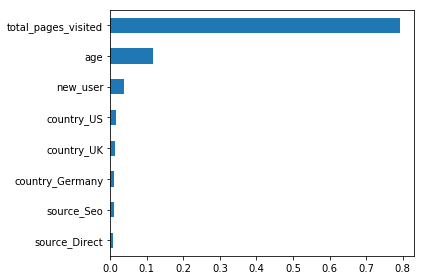

In [33]:
# Check variable importance 
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()
# total_pages_vistied is important, but we can't control it

In [34]:
#build the model without total_pages_visited
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True, class_weight={0:1, 1:10})
rf.fit(x_train.drop( 'total_pages_visited', axis=1), y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 10},
            criterion='gini', max_depth=None, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [35]:
#let's print OOB accuracy and confusion matrix
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(y_train, rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

OOB accuracy is 0.890060041916 
 OOB Confusion Matrix 
         0      1
0  185435  19536
1    3755   3126


In [36]:
#and let's print test accuracy and confusion matrix
print(
"Test accuracy is", rf.score(x_test.drop(['total_pages_visited'], axis=1),y_test), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(y_test, rf.predict(x_test.drop(['total_pages_visited'], axis=1)), labels=[0, 1]))
)

Test accuracy is 0.892061027735 
 Test Set Confusion Matrix 
        0     1
0  91652  9377
1   1886  1431


/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


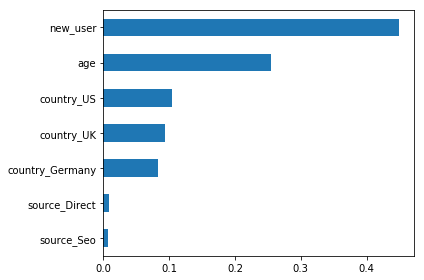

In [37]:
# re-run variable importance 
feat_importances = pd.Series(rf.feature_importances_, index=x_train.drop([ 'total_pages_visited'], axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

In [44]:
!pip install pdpbox

You should consider upgrading via the 'pip install --upgrade pip' command.


In [45]:
# Partial dependent plot
from pdpbox import pdp, info_plots

TypeError: deprecated() got an unexpected keyword argument 'addendum'

In [ ]:
#country
pdp_iso = pdp.pdp_isolate(model=rf, 
                          dataset=x_train.drop(['total_pages_visited'], axis=1),      
                          model_features=list(x_train.drop(['total_pages_visited'], axis=1)), 
                          feature=['country_Germany', 'country_UK', 'country_US'], 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='Country')
plt.show()

In [ ]:
#source
pdp_iso = pdp.pdp_isolate(model=rf, 
                          dataset=x_train.drop(['total_pages_visited'], axis=1),      
                          model_features=list(x_train.drop(['total_pages_visited'], axis=1)), 
                          feature=['source_Direct', 'source_Seo'], 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='Source')
plt.show()

In [ ]:
#new user
pdp_iso = pdp.pdp_isolate(model=rf, 
                          dataset=x_train.drop(['total_pages_visited'], axis=1),        
                          model_features=list(x_train.drop(['total_pages_visited'], axis=1)), 
                          feature='new_user', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='New User')
plt.show()

In [46]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

In [47]:
tree = DecisionTreeClassifier( max_depth=2,class_weight={0:1, 1:10}, min_impurity_decrease = 0.001)
tree.fit(x_train.drop([ 'total_pages_visited'], axis=1), y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 10}, criterion='gini',
            max_depth=2, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.001, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
#visualize it
export_graphviz(tree, out_file="tree_conversion.dot", 
                feature_names=x_train.drop(['total_pages_visited'], axis=1).columns, 
                proportion=True, rotate=True)
with open("tree_conversion.dot") as f:
    dot_graph = f.read()
  
s = Source.from_file("tree_conversion.dot")
s.view()

AttributeError: type object 'Source' has no attribute 'from_file'